<center> <h1>Herramientas Computacionales <br></br>para la Investigación Interdisciplinaria Reproducible</h1> </center>

<br></br>

* Profesor:  <a href="http://www.pucp.edu.pe/profesor/jose-manuel-magallanes/" target="_blank">Dr. José Manuel Magallanes, PhD</a> ([jmagallanes@pucp.edu.pe](mailto:jmagallanes@pucp.edu.pe))<br>Profesor del **Departamento de Ciencias Sociales, Pontificia Universidad Católica del Peru**.<br>
Senior Data Scientist del **eScience Institute** and Visiting Professor at **Evans School of Public Policy and Governance, University of Washington**.<br>
Fellow Catalyst, **Berkeley Initiative for Transparency in Social Sciences, UC Berkeley**.

## Sesión 3: Pre Procesamiento de Datos


## Parte A: Data Cleaning en Python

El pre procesamiento de datos es la parte más tediosa del proceso de investigación.

Esta primera parte delata diversos problemas que se tienen con los datos reales que están en la web, como la que vemos a continuación:

In [1]:
import IPython
wikiLink="https://en.wikipedia.org/wiki/List_of_freedom_indices" 
iframe = '<iframe src=' + wikiLink + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)

In [3]:
# aqui instala: 'lxml' y 'beautifulsoup4'
# es posible que necesites salir y volver a cargar notebook

In [2]:
# Traigamoslo con Pandas

import pandas as pd

wikiTables=pd.read_html(wikiLink,header=0,flavor='bs4',attrs={'class': 'wikitable sortable',})

In [3]:
# cuantas tenemos?
len(wikiTables)

1

Hasta aquí todo parece bien. Como solo hay uno, lo traigo y comienzo a verificar 'suciedades'.

In [4]:
DF=wikiTables[0]

#primera mirada
DF

,Country,Freedom in the World 2018[10],2018 Index of Economic Freedom[11],2018 Press Freedom Index[3],2017 Democracy Index[13]
0,Abkhazia,partly free,NaN,NaN,NaN
1,Afghanistan,not free,mostly unfree,difficult situation,authoritarian regime
2,Albania,partly free,moderately free,noticeable problems,hybrid regime
3,Algeria,not free,repressed,difficult situation,authoritarian regime
4,Andorra,free,NaN,satisfactory situation,NaN
5,Angola,not free,repressed,difficult situation,authoritarian regime
6,Antigua and Barbuda,free,NaN,satisfactory situation,NaN
7,Argentina,free,mostly unfree,noticeable problems,flawed democracy
8,Armenia,partly free,moderately free,noticeable problems,hybrid regime
9,Australia,free,free,satisfactory situation,full democracy


La limpieza requiere estrategia. Lo primero que salta a la vista, son los _footnotes_ que están en los títulos:

In [5]:
DF.columns

Index(['Country', 'Freedom in the World 2018[10]',
       '2018 Index of Economic Freedom[11]', '2018 Press Freedom Index[3]',
       '2017 Democracy Index[13]'],
      dtype='object')

In [6]:
# aqui ves que pasa cuando divido cada celda usando el caracter '['
[element.split('[') for element in DF.columns]

[['Country'],
 ['Freedom in the World 2018', '10]'],
 ['2018 Index of Economic Freedom', '11]'],
 ['2018 Press Freedom Index', '3]'],
 ['2017 Democracy Index', '13]']]

In [7]:
# Te das cuenta que te puedes quedar con el primer elemento cada vez que partes:
[element.split('[')[0] for element in DF.columns]

['Country',
 'Freedom in the World 2018',
 '2018 Index of Economic Freedom',
 '2018 Press Freedom Index',
 '2017 Democracy Index']

También hay que evitar espacios en blanco:

In [8]:
outSymbol=' ' 
inSymbol=''
[element.split('[')[0].replace(outSymbol,inSymbol) for element in DF.columns]

['Country',
 'FreedomintheWorld2018',
 '2018IndexofEconomicFreedom',
 '2018PressFreedomIndex',
 '2017DemocracyIndex']

Los números también molestan, pero están en diferentes sitios. Mejor intentemos expresiones regulares:

In [9]:
import re  # a package to use regular expressions.

# espacios: \\s+
# one or more number \\d+
# bracket que abre \\[
# bracket que cierra \\]

pattern='\\s+|\\d+|\\[|\\]'
nothing=''

#substituyendo 'pattern' por 'nothing':
[re.sub(pattern,nothing,element) for element in DF.columns]

['Country',
 'FreedomintheWorld',
 'IndexofEconomicFreedom',
 'PressFreedomIndex',
 'DemocracyIndex']

Ya tengo nuevos titulos de columna (headers)!!

In [10]:
newHeaders=[re.sub(pattern,nothing,element) for element in DF.columns]

In [11]:
# veamos los cambios:
{old:new for old,new in zip(DF.columns,newHeaders)}

{'Country': 'Country',
 'Freedom in the World 2018[10]': 'FreedomintheWorld',
 '2018 Index of Economic Freedom[11]': 'IndexofEconomicFreedom',
 '2018 Press Freedom Index[3]': 'PressFreedomIndex',
 '2017 Democracy Index[13]': 'DemocracyIndex'}

Uso un dict por si hubieses querido cambiar solo algunas columnas:

In [12]:
changes={old:new for old,new in zip(DF.columns,newHeaders)}
DF.rename(columns=changes,inplace=True)

In [13]:
# ahora tenemos:
DF

,Country,FreedomintheWorld,IndexofEconomicFreedom,PressFreedomIndex,DemocracyIndex
0,Abkhazia,partly free,NaN,NaN,NaN
1,Afghanistan,not free,mostly unfree,difficult situation,authoritarian regime
2,Albania,partly free,moderately free,noticeable problems,hybrid regime
3,Algeria,not free,repressed,difficult situation,authoritarian regime
4,Andorra,free,NaN,satisfactory situation,NaN
5,Angola,not free,repressed,difficult situation,authoritarian regime
6,Antigua and Barbuda,free,NaN,satisfactory situation,NaN
7,Argentina,free,mostly unfree,noticeable problems,flawed democracy
8,Armenia,partly free,moderately free,noticeable problems,hybrid regime
9,Australia,free,free,satisfactory situation,full democracy


Las columnas son categorías, veamos si todas se han escrito de la manera correcta:

In [25]:
DF.FreedomintheWorld.value_counts()

free           89
partly free    62
not free       55
Name: FreedomintheWorld, dtype: int64

In [26]:
DF.IndexofEconomicFreedom.value_counts()

mostly unfree      63
moderately free    62
mostly free        28
repressed          21
free                6
Name: IndexofEconomicFreedom, dtype: int64

In [27]:
DF.PressFreedomIndex.value_counts()

noticeable problems       63
difficult situation       50
satisfactory situation    37
very serious situation    22
good situation            17
Name: PressFreedomIndex, dtype: int64

In [51]:
idhCol="https://www.datosmacro.com/idh/colombia" 
iframe = '<iframe src=' + idhCol + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)

In [52]:
import pandas as pd

webTable=pd.read_html(idhCol,header=0,flavor='bs4',attrs={'id': 'tb0',})

In [17]:
len(webTable)

1

In [54]:
idhColT=webTable[0]
idhColT

,Fecha,IDH,Ranking IDH
0,2015,727,95º
1,2014,724,97º
2,2013,720,98º
3,2012,712,98º
4,2011,707,98º
5,2010,700,97º
6,2009,695,98º
7,2008,691,89º
8,2007,683,99º
9,2006,675,99º


El problema es que se borraron los decimales. Como se ve en la web, estos tenían una coma en vez de un punto. A esta altura podemos eliminarlo, o buscar si durante el proceso de colección se puede mejorar esto; dale una mirada a la función:

In [23]:
?pd.read_html

Siguiendo las instrucciones escibimos:

In [55]:
idhColT=pd.read_html(idhColombia,header=0,flavor='bs4',attrs={'id': 'tb0',},
                      thousands=None, decimal=',')[0]
idhColT

,Fecha,IDH,Ranking IDH
0,2015,0.727,95º
1,2014,0.724,97º
2,2013,0.720,98º
3,2012,0.712,98º
4,2011,0.707,98º
5,2010,0.700,97º
6,2009,0.695,98º
7,2008,0.691,89º
8,2007,0.683,99º
9,2006,0.675,99º


El ranking no es un numero, pues el símbolo ordinal lo evita, eliminemoslo:

In [81]:
idhColT.loc[:,'Ranking IDH']=idhColT.loc[:,'Ranking IDH'].str.replace('º',"")
idhColT

,Fecha,IDH,Ranking IDH
0,2015,0.727,95
1,2014,0.724,97
2,2013,0.720,98
3,2012,0.712,98
4,2011,0.707,98
5,2010,0.700,97
6,2009,0.695,98
7,2008,0.691,89
8,2007,0.683,99
9,2006,0.675,99


Traigamos una nueva tabla:

In [83]:
idhCol2='https://es.wikipedia.org/wiki/Anexo:Departamentos_de_Colombia_por_IDH'
iframe = '<iframe src=' + idhCol2 + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)

Aparentemente sabemos qué hacer:

In [99]:
idhColT2=pd.read_html(idhColombia2,header=0,flavor='bs4',attrs={'class': 'sortable',},
                       thousands=' ', decimal=',')[0]
idhColT2

,Entidad,IDH,Población[2]​,País Comparable[3]​ [nota 1]​
0,Bogotá,0.904,7 674 366,República Checa
1,Santander,0.879,2 340 988,Hungría
2,Casanare,0.867,344 027,Argentina
3,Valle del Cauca,0.861,4 520 166,Bahamas
4,Antioquia,0.849,6 299 886,Brasil
5,Boyacá,0.842,1405122,Bulgaria
6,Risaralda,0.839,941 283,San Cristóbal y Nieves
7,Cundinamarca,0.837,2 598 245,Rumania
8,Atlántico,0.835,2 403 027,Montenegro
9,San Andrés,0.834,75 167,Montenegro


Aparentemente, sólo Boyacá tenía espacios en blanco.

En este caso, el primer problema es que los miles marcados con _espacios_ no desaparecieron. Eso se debe a que en el html están señalados como **& nbsp;**. De ahi que:

In [103]:
idhColT2=pd.read_html(idhColombia2,header=0,flavor='bs4',attrs={'class': 'sortable',},
                       thousands='\xa0', decimal=',')[0]
idhColT2

,Entidad,IDH,Población[2]​,País Comparable[3]​ [nota 1]​
0,Bogotá,0.904,7674366,República Checa
1,Santander,0.879,2340988,Hungría
2,Casanare,0.867,344027,Argentina
3,Valle del Cauca,0.861,4520166,Bahamas
4,Antioquia,0.849,6299886,Brasil
5,Boyacá,0.842,1 405 122,Bulgaria
6,Risaralda,0.839,941283,San Cristóbal y Nieves
7,Cundinamarca,0.837,2598245,Rumania
8,Atlántico,0.835,2403027,Montenegro
9,San Andrés,0.834,75167,Montenegro


Pues, Boyacá es ahora el problema. Eso lo resolveremos fuera de la llamada:

In [112]:
idhColT2.iloc[:,2]=idhColT2.iloc[:,2].str.replace("\s","")
idhColT2

,Entidad,IDH,Población[2]​,País Comparable[3]​ [nota 1]​
0,Bogotá,0.904,7674366,República Checa
1,Santander,0.879,2340988,Hungría
2,Casanare,0.867,344027,Argentina
3,Valle del Cauca,0.861,4520166,Bahamas
4,Antioquia,0.849,6299886,Brasil
5,Boyacá,0.842,1405122,Bulgaria
6,Risaralda,0.839,941283,San Cristóbal y Nieves
7,Cundinamarca,0.837,2598245,Rumania
8,Atlántico,0.835,2403027,Montenegro
9,San Andrés,0.834,75167,Montenegro


Los nombres de columnas necesitan tratamiento, podríamos usar lo que ya vimos:

In [113]:
[re.sub(pattern,nothing,element) for element in idhColT2.columns]

['Entidad', 'IDH', 'Población\u200b', 'PaísComparable\u200bnota\u200b']

O mejorar el patrón:

In [114]:
pattern2='\\s+|\\d+|\\[|\\]|\\u200b'
[re.sub(pattern2,nothing,element) for element in idhColT2.columns]

['Entidad', 'IDH', 'Población', 'PaísComparablenota']

Pero esta vez, hay _footnotes_ con texto, cuando antes sólo tenía números, de ahi que jueguemos simple:

In [116]:
[element.split('[')[0].replace(" ","") for element in idhColT2.columns]

['Entidad', 'IDH', 'Población', 'PaísComparable']

Cambiemos con esto los _headers_:

In [117]:
idhColT2.columns=[element.split('[')[0].replace(" ","") for element in idhColT2.columns]
idhColT2

,Entidad,IDH,Población,PaísComparable
0,Bogotá,0.904,7674366,República Checa
1,Santander,0.879,2340988,Hungría
2,Casanare,0.867,344027,Argentina
3,Valle del Cauca,0.861,4520166,Bahamas
4,Antioquia,0.849,6299886,Brasil
5,Boyacá,0.842,1405122,Bulgaria
6,Risaralda,0.839,941283,San Cristóbal y Nieves
7,Cundinamarca,0.837,2598245,Rumania
8,Atlántico,0.835,2403027,Montenegro
9,San Andrés,0.834,75167,Montenegro


Sucede algo similar con los contenidos de las columnas (vease 'Región Amazónica'). De ahí que:

In [133]:
idhColT2.Entidad=[element.split('[')[0] for element in idhColT2.Entidad]
idhColT2

,Entidad,IDH,Población,PaísComparable
0,Bogotá,0.904,7674366,República Checa
1,Santander,0.879,2340988,Hungría
2,Casanare,0.867,344027,Argentina
3,Valle del Cauca,0.861,4520166,Bahamas
4,Antioquia,0.849,6299886,Brasil
5,Boyacá,0.842,1405122,Bulgaria
6,Risaralda,0.839,941283,San Cristóbal y Nieves
7,Cundinamarca,0.837,2598245,Rumania
8,Atlántico,0.835,2403027,Montenegro
9,San Andrés,0.834,75167,Montenegro


Es importante darnos cuenta que hay símbolos _no apropiados_ para representar valores faltantes (i.e.'--'). Eso es preocupante, en particular para los numéricos. Juntemos ambas columnas para buscar inapropiados:

In [139]:
numericos=list(idhColT2.IDH)
numericos.extend(list(idhColT2.Población))

In [141]:
numericos

[0.904,
 0.879,
 0.867,
 0.861,
 0.8490000000000001,
 0.8420000000000001,
 0.8390000000000001,
 0.8370000000000001,
 0.835,
 0.8340000000000001,
 0.8320000000000001,
 0.828,
 0.823,
 0.8220000000000001,
 0.81,
 0.807,
 0.804,
 0.804,
 0.7979999999999999,
 0.7959999999999999,
 0.785,
 0.782,
 0.775,
 0.773,
 0.768,
 0.759,
 0.752,
 0.731,
 0.691,
 0.84,
 '7674366',
 '2340988',
 '344027',
 '4520166',
 '6299886',
 '1405122',
 '941283',
 '2598245',
 '2403027',
 '75167',
 '558934',
 '984128',
 '2049083',
 '924843',
 '1004064',
 '1126314',
 '256527',
 '1400203',
 '1658090',
 '1332335',
 '1235425',
 '1354744',
 '834927',
 '1701840',
 '--',
 '337054',
 '465477',
 '490327',
 '902386',
 '47121089']

Vemos que varios numeros está como texto, lo que por ahora no es problema. La idea es encontrar aquello que están entre los números y no lo son:

In [144]:
for n in numericos:
    float(n)

ValueError: could not convert string to float: '--'

Hems encontrado un simbolo que no se puede convertir a _float_. POdría haber otros, pero ya sabemos qué error arroja.

De ahí que:

In [145]:
inapropiados=[]
for n in numericos:
    try:
        float(n)
    except ValueError:
        inapropiados.append(n)

In [146]:
# aqui están
inapropiados

['--']

Sólo había una (ya lo sabíamos), pero el código sirve para más de uno.

Lo que nos queda, es reemplazar ese valor por 'None':

In [167]:
idhColT2.replace(inapropiados,value=[None]*len(inapropiados)) # se necesita la misma cantidad de 'None'

,Entidad,IDH,Población,PaísComparable
0,Bogotá,0.904,7674366,República Checa
1,Santander,0.879,2340988,Hungría
2,Casanare,0.867,344027,Argentina
3,Valle del Cauca,0.861,4520166,Bahamas
4,Antioquia,0.849,6299886,Brasil
5,Boyacá,0.842,1405122,Bulgaria
6,Risaralda,0.839,941283,San Cristóbal y Nieves
7,Cundinamarca,0.837,2598245,Rumania
8,Atlántico,0.835,2403027,Montenegro
9,San Andrés,0.834,75167,Montenegro


In [180]:
idhColT2.replace(inapropiados,value=[None]*len(inapropiados),inplace=True) 

Un detalle final. A veces es necesario eliminar las tildes. Por ejemplo, arriba Perú no lleva tilde, y eso evitaría que se relacione con otra tabla donde sí la tiene.

El proceso es:

In [186]:
#instalar unidecode
from unidecode import unidecode as notilde   

#Luego
idhColT2.columns=[notilde(e) for e in idhColT2.columns]

In [192]:
notilde2=lambda x: x if x is None else notilde(x)
idhColT2[['Entidad','PaisComparable']]=idhColT2[['Entidad','PaisComparable']].applymap(notilde2)

In [193]:
idhColT2

,Entidad,IDH,Poblacion,PaisComparable
0,Bogota,0.904,7674366,Republica Checa
1,Santander,0.879,2340988,Hungria
2,Casanare,0.867,344027,Argentina
3,Valle del Cauca,0.861,4520166,Bahamas
4,Antioquia,0.849,6299886,Brasil
5,Boyaca,0.842,1405122,Bulgaria
6,Risaralda,0.839,941283,San Cristobal y Nieves
7,Cundinamarca,0.837,2598245,Rumania
8,Atlantico,0.835,2403027,Montenegro
9,San Andres,0.834,75167,Montenegro


## Text cleaning

Cleaning text is a hard job, especially because you need to know what to delete in advance, which should improve and not deteriorate the discourse under analysis.

In [2]:
# access permission
import json
keysAPI = json.load(open('keysAPI.txt','r'))

In [3]:
# recovering tweets:
import tweepy

consumer_key = keysAPI['consumer_key']
consumer_secret = keysAPI['consumer_secret']
access_token = keysAPI['access_token']
access_token_secret = keysAPI['access_token_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True,parser=tweepy.parsers.JSONParser())
tweets = api.user_timeline(screen_name = 'JuanManSantos', count = 1000, include_rts = False)

In [5]:
# organizing data frame

import pandas as pd

dataTweets={'eachTweet':[t['text'] for t in tweets]}
discourse=pd.DataFrame(dataTweets)
discourse.head()

,eachTweet
0,¡Excelente noticia! https://t.co/MvweXRDeqV
1,Hago un nuevo llamado a la comunidad para que ...
2,"Apoyamos la evacuación de 23.900 personas, 3.6..."
3,Gracias a quienes han trabajado sin descanso p...
4,Hoy sobrevolamos Hidroituango y llegamos al Pu...


A common goal before analyzing Tweeter is to join every tweet:

In [6]:
discourseAll = " ".join(list(discourse.eachTweet.values))

Once you have joined all the tweets, this is a common way to get rid of words representing other users, hashtags, urls, and retweet tags:

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/JoseManuel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
original=stopwords.words('spanish')
original.extend(['Colombia','colombiano','años','Hoy','país','hace'])
original

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosostros',
 'vosostras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestr

In [7]:
discourseAll_no_urls_no_tags = " ".join([word for word in discourseAll.split()
                                if 'http' not in word
                                    and not word.startswith('@')
                                    and not word.startswith('#')
                                    and word != 'RT'
                                ])

This may be the cleanest you can get, from here would come text exploration.

(-0.5, 399.5, 199.5, -0.5)

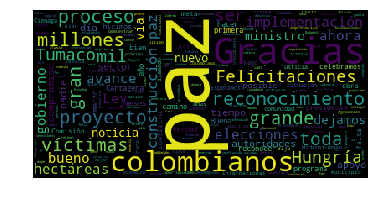

In [34]:
#wordcloud
#matplotlib
#nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(stopwords=original).generate(discourseAll_no_urls_no_tags)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wordcloud)
plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(discourseAll_no_urls_no_tags)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

### Homework:

Clean your data.